<div style ="background:#041f33; border:1px solid #b3c6e7; padding:12px; border-radius:6px; font-size:24px; font-family:Pacifico, cursive; color:#d2691e;">
             <b>  MUSHROOMS: EDIBLE OR POISONOUS?</b>
             </div>

<p align="center">
  <img src="https://images.medicinenet.com/images/article/main_image/what-is-the-best-medical-mushroom-health-benefits.jpg?output-quality=75" width="2000"/>
</p>


<div style='background:#041f33; border:1px solid #b8cee52c; padding:12px; border-radius:6px; font-size:16px;'>
<b>Mushrooms are a highly nutritious and versatile food enjoyed in cuisines around the world. However, not all mushrooms are safe to eat—while some varieties are edible and offer health benefits, others are poisonous and can cause serious illness if consumed. Differentiating between edible and poisonous mushrooms can be challenging, as many species look similar in appearance. This data analysis aims to explore the characteristics that distinguish edible mushrooms from poisonous ones by examining various features such as color, shape, and habitat. By applying statistical and machine learning techniques, we hope to identify key patterns and build predictive models that can help classify mushrooms as safe or unsafe for consumption.</b>

Data Source: [UCI Machine Learning Repository - Mushroom Data Set](https://archive.ics.uci.edu/ml/datasets/mushroom)

### Data preprocessing and exploratory data analysis (EDA)

<div style="background:#041f33; border:1px solid #b3c6e7; padding:12px; border-radius:6px; font-size:16px;">
Before doing any analysis on the mushroom dataset, I performed some essential preprocessing steps to ensure the data was clean and ready for analysis. Here are the key steps I took:

In [100]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import display, HTML
%matplotlib inline

In [101]:
# reading the file
df = pd.read_csv('mushrooms.csv')
df.head(6)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [102]:
# dropping null values
df = df.dropna()

In [103]:
# measuring the shape of the dataframe
df.shape

(8124, 23)

<div style="background:#; border-left:6px solid #1d7ba1; padding:16px; margin-bottom:12px; border-radius:8px; font-size:16px;">
df.shape gives us the details of rows and columns in the dataset. The dataset has 8124 rows (instances) and 22 features + 1 label columns.
</div>

In [104]:
all_categorical = all(df.dtypes == 'object')
yesorno = 'Yes' if all_categorical else 'No'
display(HTML(f"""<div style='background:#041f33; border:1px solid #b3c6e7; padding:12px; border-radius:6px; font-size:16px;'>
             <b>Are all columns categorical?</b><br>
             <b>{yesorno}</b>
             </div>"""))



<div style="background:#; border-left:6px solid #1d7ba1; padding:16px; margin-bottom:12px; border-radius:8px; font-size:16px;">
It is clear from the previous operation that all columns are categorical. To prepare the data for analysis, we will perform one-hot encoding on the categorical variables. This process converts categorical variables into a format that can be provided to machine learning algorithms to improve predictions.
</div>

In [126]:
# splitting the data into features and target variable
y = df['class']
X = df.drop('class', axis=1)

y.head()


0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [106]:
# converting y into binary values
y = y.map({'e': 0, 'p': 1})
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [107]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [108]:
# one-hot encoding the categorical variables
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded = ohe.fit_transform(X)
column_names = ohe.get_feature_names_out(X.columns)
X_enc = pd.DataFrame(encoded, columns=column_names)
X_enc.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<div style="background:#; border-left:6px solid #1d7ba1; padding:16px; margin-bottom:12px; border-radius:8px; font-size:16px;">
  <b>Why One-Hot Encoding is Necessary Before PCA:</b><br>
  One-hot encoding is necessary before running PCA on categorical data because <b>PCA requires numerical input</b>. Categorical variables (like "f", "g", "s", "y", etc) cannot be directly used in PCA, as PCA computes variances and covariances, which are only defined for numbers. One-hot encoding converts each category into a binary (0/1) column, making the data numerical and suitable for PCA. This allows PCA to analyze patterns and reduce dimensionality in datasets that originally contained categorical features.
</div>

In [109]:
df_ohe = pd.get_dummies(df, columns=df.columns.drop('class'))
print("Before:", df.shape)
print("After:", X_enc.shape)

Before: (8124, 23)
After: (8124, 95)


<div style="background:#; border-left:6px solid #1d7ba1; padding:16px; margin-bottom:12px; border-radius:8px; font-size:16px;">
  <b>Why the number of features increased?:</b><br>
    The number of features has increased from 22 to 94 (excluding one label column) after one-hot encoding. Each unique value in a categorical column is <b>transformed into a new binary column (0 or 1)</b>, indicating the presence or absence of that value. For example, if cap_surface has four unique values (f, g, s, y), one-hot encoding creates four new columns: cap_surface_f, cap_surface_g, cap_surface_s, and cap_surface_y. Each row has a 1 in the column corresponding to its original value and 0s in the other columns. Moreover, the first unique value in each categorical column is dropped to avoid multicollinearity, which is why the total number of features is less than the sum of unique values across all columns.
</div>

In [110]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_enc)
X_scaled = pd.DataFrame(X_scaled, columns=X_enc.columns)
X_scaled.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.022195,1.475942,-0.815325,-0.073794,-0.475867,...,-0.227567,2.347257,-0.994599,-0.51672,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
1,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.022195,1.475942,-0.815325,-0.073794,-0.475867,...,4.394315,-0.426029,-0.994599,-0.51672,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582
2,-0.022195,-0.79621,-0.336878,-0.062885,-0.904579,-0.022195,1.475942,-0.815325,-0.073794,-0.475867,...,4.394315,-0.426029,-0.994599,-0.51672,-0.599531,-0.337783,5.178988,-0.404842,-0.217824,-0.155582
3,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.022195,-0.677534,1.226505,-0.073794,-0.475867,...,-0.227567,2.347257,-0.994599,-0.51672,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
4,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.022195,1.475942,-0.815325,-0.073794,-0.475867,...,-0.227567,-0.426029,-0.994599,-0.51672,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582


<div style="background:#; border-left:6px solid #1d7ba1; padding:16px; margin-bottom:12px; border-radius:8px; font-size:16px;">
    <b>Why Standardization is Important Before PCA?:</b><br>
    Even though features now have only binary values, Some categories produce only 2 columns (e.g., bruises with 2 categories), others produce many columns (e.g., habitat with 7 categories).
    Without scaling, PCA may give more weight to features with higher variance (those with more categories, hence more spread-out values).
    Standardization puts all features on the same scale (mean=0, variance=1), so PCA captures true patterns, not just artifacts of scale.
</div>

<div style="background:#; border-left:6px solid #1d7ba1; padding:16px; margin-bottom:12px; border-radius:8px; font-size:16px;">
This fact can be visualized by comparing the PCA results before and after scaling. Before scaling, the first few principal components may explain a large portion of the variance due to features with many categories dominating the variance structure. After scaling, the variance is more evenly distributed across features, allowing PCA to identify more meaningful patterns in the data.
</div>

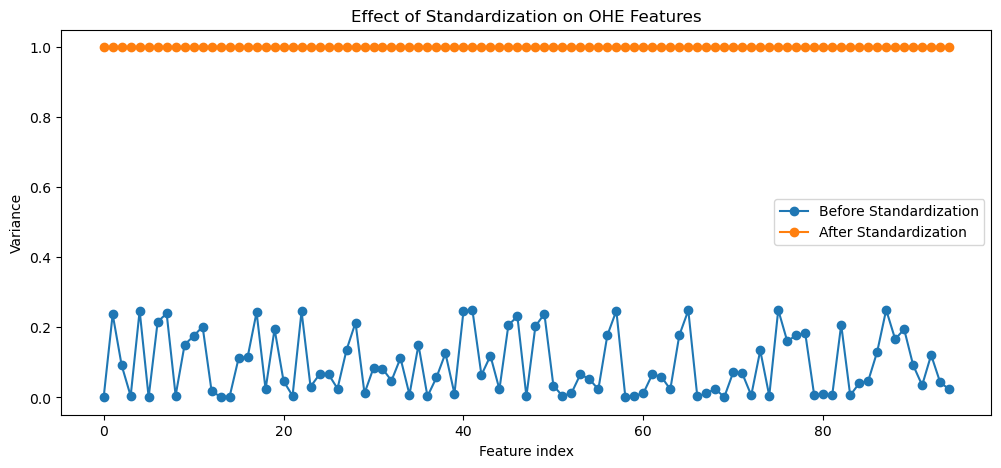

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# variance before scaling
var_before = X_enc.var().values

# scale and recompute variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_enc)
var_after = X_scaled.var(axis=0)

# plot
plt.figure(figsize=(12,5))
plt.plot(var_before, 'o-', label="Before Standardization")
plt.plot(var_after, 'o-', label="After Standardization")
plt.xlabel("Feature index")
plt.ylabel("Variance")
plt.title("Effect of Standardization on OHE Features")
plt.legend()
plt.show()


<div style="background:#; border-left:6px solid #1d7ba1; padding:16px; margin-bottom:12px; border-radius:8px; font-size:16px;">
  <b>Variance Comparison Before and After Scaling:</b><br>
    Notice how before scaling, a few features have very high variance while others have very low variance. After scaling, all features have a variance of 1, indicating they are on the same scale.
</div>

### PRINCIPAL COMPONENT ANALYSIS (PCA)

In [112]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-3.68014629e+00, -1.48440900e+00, -6.36762714e-01, ...,
         1.56329540e-16, -1.17736515e-17, -7.54288358e-17],
       [-2.86440428e+00, -1.76737661e+00,  1.29471371e+00, ...,
        -6.52543091e-16, -1.28544120e-16,  7.11225372e-17],
       [-4.09318769e+00, -1.87312698e+00,  1.27443187e+00, ...,
        -1.35218935e-17, -4.00796173e-17,  3.96415827e-17],
       ...,
       [-3.94437264e+00,  1.23354793e+01,  6.36364698e+00, ...,
        -1.60624614e-17,  5.93841397e-18,  6.67535457e-19],
       [ 7.33219499e-01,  2.32313581e+00, -4.28679226e+00, ...,
         4.36320552e-18,  1.49860663e-18,  2.51380072e-18],
       [-4.50102155e+00,  1.63963728e+01,  8.53755353e+00, ...,
         3.26922689e-17, -3.77632102e-18, -1.37162304e-17]])

In [113]:
# calculate explained variance
explained_variance = pca.explained_variance_ratio_
# calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
n_components_95

55

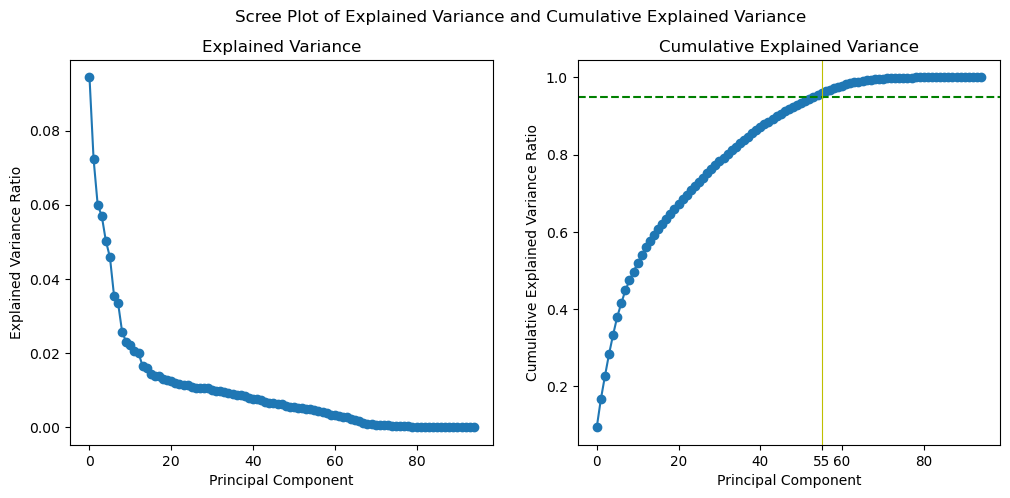

In [114]:
from IPython.display import display, HTML

# scree plot of explained variance and cumulative explained variance
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(explained_variance, 'o-')
plt.title("Explained Variance")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.subplot(1,2,2)
plt.plot(cumulative_explained_variance, 'o-')
plt.xticks(np.arange(0,len(cumulative_explained_variance),20))
plt.xticks(
    list(plt.xticks()[0]) + [n_components_95],
    list(map(str, plt.xticks()[0])) + [f"{n_components_95}"],
    fontsize=9.8
)
plt.title("Cumulative Explained Variance")
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.axhline(y=0.95, color='g', linestyle='--')
plt.axvline(x=n_components_95, color='y', linestyle='-', linewidth=0.8)
plt.suptitle("Scree Plot of Explained Variance and Cumulative Explained Variance")
plt.show()

display(HTML(f"""
<div style='background:#041f33; border:1px solid #b3c6e7; padding:12px; border-radius:6px; font-size:16px;'>
<b>Optimal Number of Principal Components:</b><br>
Based on the cumulative explained variance plot, <b>{n_components_95}</b> components are needed to capture at least 95% of the variance in the data.
</div>
"""))

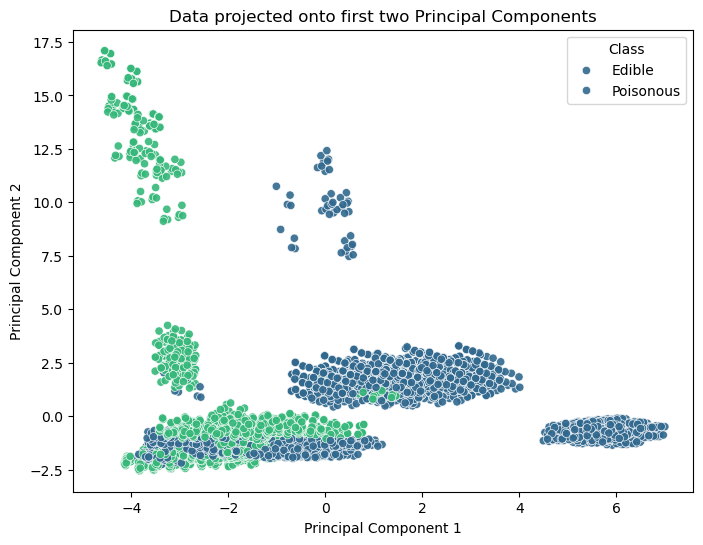

In [130]:
# projecting the data onto the first two principal components
X_pca_2d = X_pca[:, :2]
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=y, palette='viridis', alpha=0.9)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data projected onto first two Principal Components")
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

display(HTML(f"""
<div style='background:#041f3; border:1px solid #b3c6e7; padding:12px; border-radius:6px; font-size:16px;'>
             <b>Observation:</b><br>
             There is some separation between edible and poisonous mushrooms along the first principal component, but they are not completely separable.
             From the cumulative explained variance plot, we see that first two components capture <b>{cumulative_explained_variance[1].round(2)*100}%</b> variance between them. 
             This indicates that while PCA helps in reducing dimensionality, more components are needed for better class separation.
</div>"""))

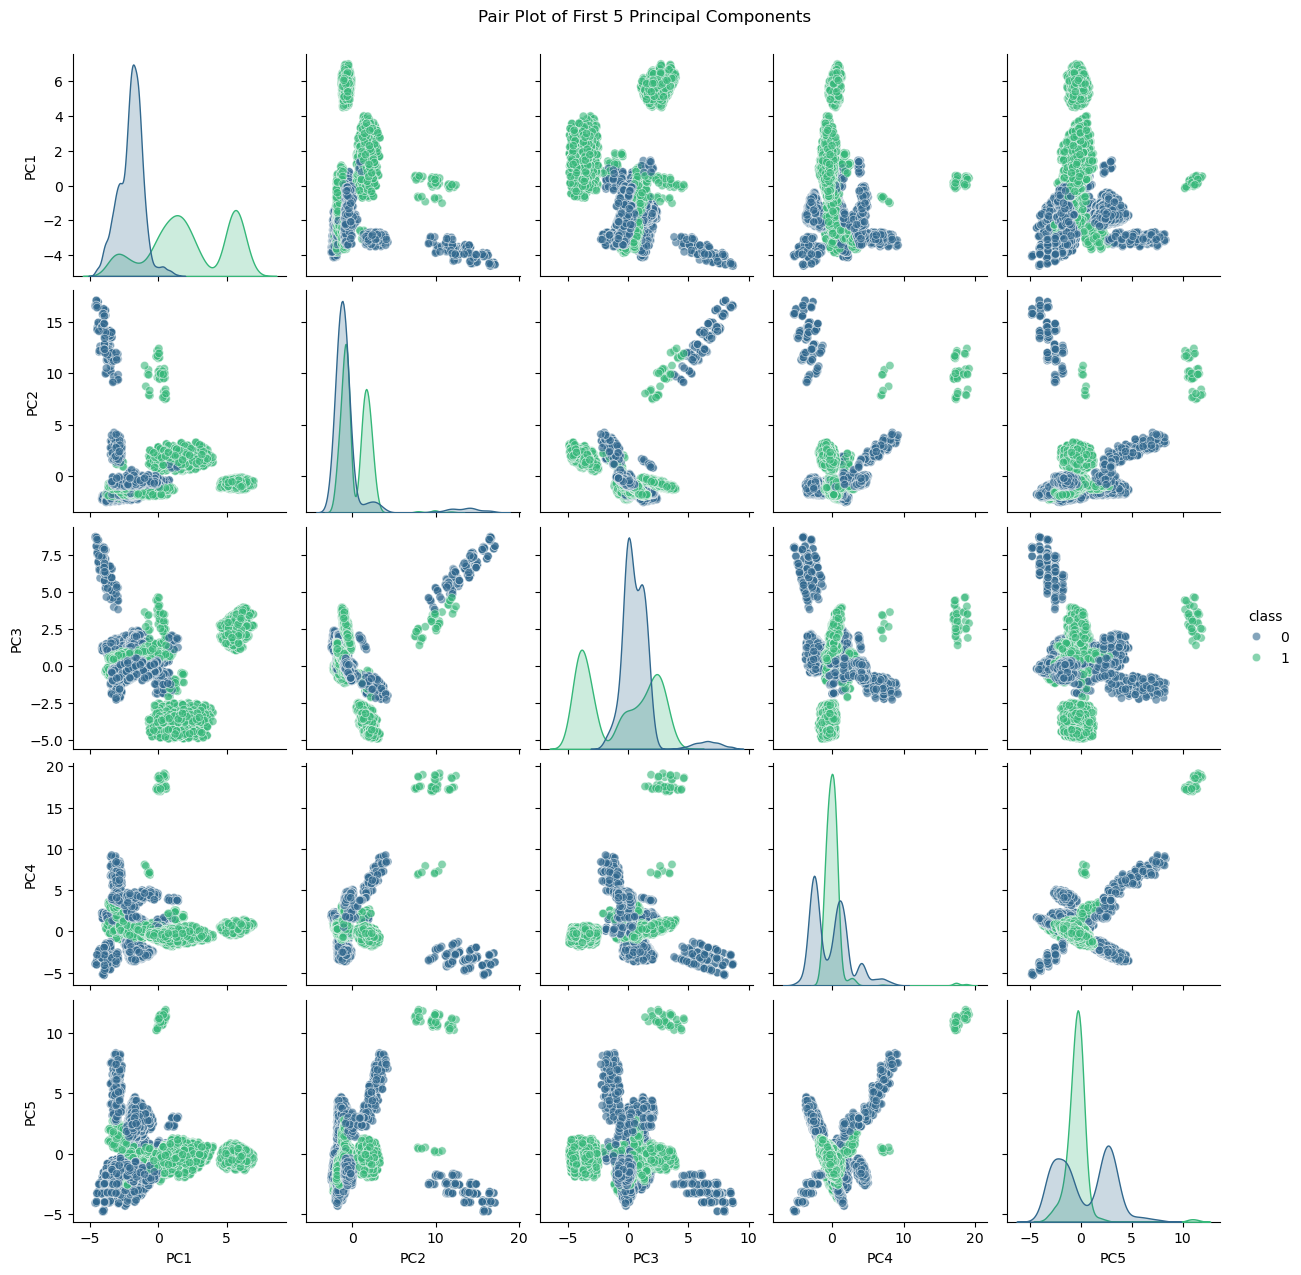

In [116]:
# visualizing separatiblity using pair plot
pca_df = pd.DataFrame(X_pca[:, :5], columns=[f'PC{i+1}' for i in range(5)])
pca_df['class'] = y.values
sns.pairplot(pca_df, hue='class', diag_kind='kde', palette='viridis', plot_kws={'alpha':0.6})
plt.suptitle("Pair Plot of First 5 Principal Components", y=1.02)
plt.show()

In [117]:
display(HTML(f"""
<div style='background:#557190; border:1px solid #b3c6e7; padding:12px; border-radius:6px; font-size:16px;'>
            <b>Observation:</b><br> 
            The pair plot of the first 5 principal components shows improved separation between edible and poisonous mushrooms compared to just the first two components.
            However, even the first 5 components do not achieve perfect separation, indicating that more components may be needed for better classification.
</div>"""))

### Performance Evaluation with Logistic Regression

In [118]:
# splitting the standardized data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
### Performance Evaluation with Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
start = time.time()
log.fit(X_train, y_train)  # training the model
end = time.time()
y_pred = log.predict(X_test)

d1 = (end-start)


<div style='background:#041f33; border:1px solid #b3c6e7; padding:12px; border-radius:6px; font-size:16px;'>
<h3><b>Classification Metrics</b></h3>
 Let's understand the key classification metrics used to evaluate the performance of our logistic regression model:
<ul>
  <li><h4><b>Confusion Matrix</b></h4>
    <table border="1" cellpadding="5" cellspacing="0">
  <tr>
    <th></th>
    <th>Predicted Positive</th>
    <th>Predicted Negative</th>
  </tr>
  <tr>
    <th>Actual Positive</th>
    <td>True Positive (TP)</td>
    <td>False Negative (FN)</td>
  </tr>
  <tr>
    <th>Actual Negative</th>
    <td>False Positive (FP)</td>
    <td>True Negative (TN)</td>
  </tr>
</table>
<br>
  <li><b>Accuracy</b>: Ratio of "True positive" and "True negative" with all predictions. Measures overall correctness of predictions.</li>
  <li><b>Precision</b>: Ratio of "True Positive" with other "Positive" measures. This tells us how accurately the model identified the positives.</li>
  <li><b>Recall</b>: Ratio of "True Positive"s with sum of "True Positives" and "False Negative" (missed positives). This gives fraction of actual positives that were correctly identified.</li>
  <li><b>F1 Score</b>: 2 * (Precision * Recall) / (Precision + Recall). Balance between precision and recall.</li>
</ul>


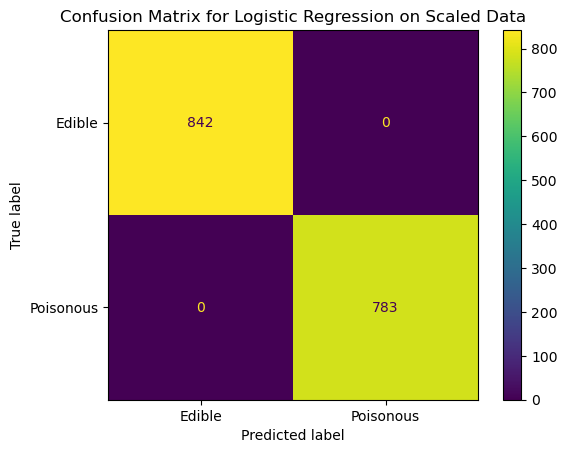

In [119]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Edible', 'Poisonous'])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix for Logistic Regression on Scaled Data")
plt.show()

display(HTML(f"""
<div style='background:#041f33; border:1px solid #b3c6e7; padding:12px; border-radius:6px; font-size:16px;'>
<b>Logistic Regression Performance on Scaled Data:</b><br>
Accuracy: {accuracy:.4f}<br>
Precision: {precision:.4f}<br>
Recall: {recall:.4f}<br>
F1-Score: {f1:.4f}<br>
</div>
"""))

<div style="background:#041f33; border:1px solid #b3c6e7; padding:12px; border-radius:6px; font-size:16px;">
<b>Why use PCA Despite Perfect Logistic Regression?</b><br>
Logistic Regression already achieves perfect accuracy on this dataset. 
However, PCA is still valuable because it <b>reduces dimensionality</b>, 
<b>improves visualization</b> of class separation, and helps identify 
<b>redundant or correlated features</b>. 
This makes the analysis more interpretable and computationally efficient, 
even when accuracy is already high.
</div>


### Applying Logistic Regression on PCA-transformed Data

In [132]:
# transforming training and test features using n_components_95
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components_95)

# training set
X_train_pca = pca.fit_transform(X_train)

# test set
X_test_pca = pca.fit_transform(X_test)


In [121]:
# performing logisitical regression on PCA-transformed features
start = time.time()
log.fit(X_train_pca, y_train)
y_pred_pca = log.predict(X_test_pca)
end = time.time()
d2 = end-start

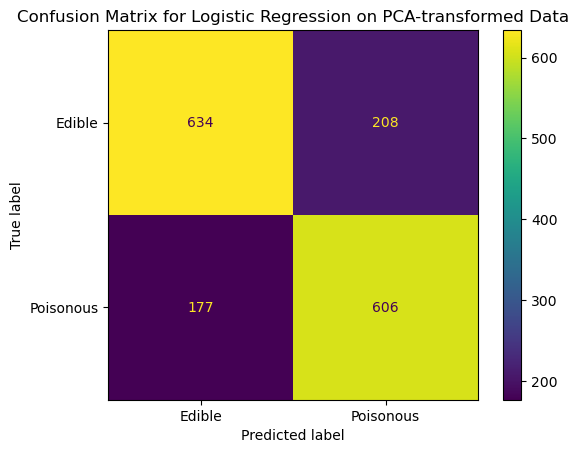

,Edible,Poisonous
precision,0.7818,0.7445
recall,0.7530,0.7739
f1-score,0.7671,0.7589
support,842.0000,783.0000


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)
cm_pca = confusion_matrix(y_test, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=['Edible', 'Poisonous'])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix for Logistic Regression on PCA-transformed Data")
plt.show()

report = classification_report(y_test, y_pred_pca, target_names=['Edible', 'Poisonous'], output_dict=True)
df_report = pd.DataFrame.from_dict(report)
df_report = df_report.drop(columns=['accuracy', 'macro avg', 'weighted avg'])  # keep only class-specific metrics
# display as HTML table
df_html = df_report.round(4).to_html(
    border=0,
    classes='table table-bordered table-hover',
    justify='center'
)

# Add custom CSS for better appearance
custom_css = """
<style>
.table-bordered {
    border: 1px solid #041f33;
    border-radius: 8px;
    background: #386fa6;
    font-size: 16px;
    margin-bottom: 12px;
}
.table-hover tbody tr:hover {
    background-color: #e8f558;
}
th, td {
    padding: 8px 16px;
    text-align: center;
    border: 1px solid #041f33;
}
</style>
"""
display(HTML(custom_css + df_html))

### CONCLUSION

<div style="background:#041f33; border:1px solid #b3c6e7; padding:12px; border-radius:6px; font-size:16px;">
<b>Did PCA-transformation increase performance?</b><br>

<b>NO</b>. In fact, accuracy and other parameters of performance actually <em>decreased</em> after performing PCA. The reason is that PCA is fundamentally a dimensionality-reduction algorithm and in doing so, it may have caused some information loss.

<b>Why use PCA despite information loss?</b><br>
<br>PCA is valuable even though it may cause some information loss because it simplifies complex, high-dimensional data.
</div>


In [134]:
display(HTML(f"""<div style="background:#041f33; border:1px solid #b3c6e7; padding:12px; border-radius:6px; font-size:16px;">
                <b>Advantages of PCA: Why take the trade-off of information loss for dimensionality reduction</b><br>
             
               <br>1. Recall how one-hot encoding created {X_enc.shape[1]} features but PCA reduced it to only <em>{n_components_95}</em> features 
                  while retaining 95% of the variance in the original dataset. This advantage of PCA is crucial in enormously 
                  large datasets that have 1000s of features.
                  <br>
               <br>2. The time taken for training the logistic regression on the scaled data was <b>{d1:.4f} seconds</b> 
                     while on the PCA-transformed data it was <b>{d2:.4f} seconds</b>. 
                     This shows that PCA can significantly speed up model training time, 
                     especially for complex models and large datasets.
                     <br>
               <br>3. The logistic regression model on the PCA-transformed data achieved an accuracy of <b>{accuracy_pca:.4f}</b>,
                     which is very close to the accuracy of <b>{accuracy:.4f}</b> on the full scaled data. 
                     This indicates that PCA can reduce dimensionality without a substantial loss in model performance.
                  <br>
               <br>4. There is correlation among the original features as seen in the correlation heatmap. 
                     PCA helps to eliminate this redundancy by transforming correlated features into a set of uncorrelated principal components.
                     This removes redundancy as correlated features have overlapping information. By removing redundancy, PCA helps to create a more efficient representation of the data.
               

</div>"""))

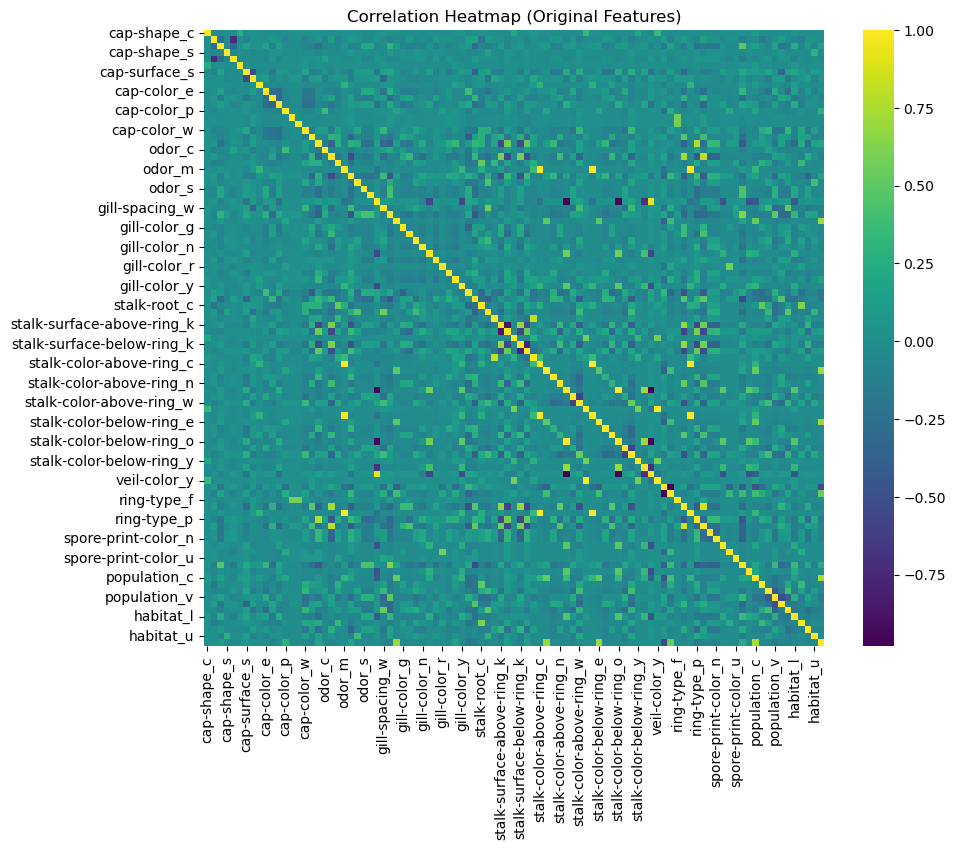

In [124]:
#  Correlation heatmap for dataset before PCA-transformation
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(X_enc).corr(), cmap='viridis')
plt.title("Correlation Heatmap (Original Features)")
plt.show()


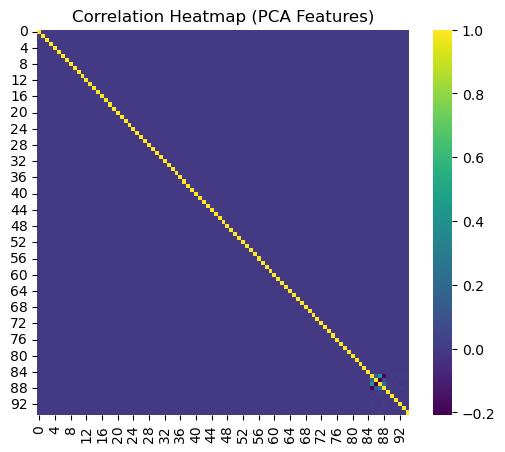

In [125]:
# correlation heatmap for dataset after PCA-transformation
plt.figure(figsize=(6,5))
sns.heatmap(pd.DataFrame(X_pca).corr(), cmap='viridis')
plt.title("Correlation Heatmap (PCA Features)")
plt.show()

<div style="background:#041f33; border:1px solid #b3c6e7; padding:12px; border-radius:6px; font-size:16px;">
<b>Why I used Logistic Regression?</b><br>

1. It provides a clear, quantitative metric (accuracy, precision, recall, F1-score) to compare model performance before and after dimensionality reduction.

2. If Logistic Regression achieves similar performance on PCA-transformed data as on the original data, it suggests that PCA has retained most of the important information. But, if performance drops significantly after PCA, it may indicate that too much information was lost during dimensionality reduction.

3. Logistic Regression is sensitive to multicollinearity, so PCA's ability to eliminate correlation among features can improve model stability and interpretability.
<br>
</div>
<div style="background:#041f33; border:1px solid #b3c6e7; padding:12px; border-radius:6px; font-size:16px;">
<b>Why not use some other method?</b>
<br>
<br>I could have used other classification algorithms like Decision Trees, Random Forests, or SVM. However, Logistic Regression is a simple and interpretable model that works well for binary classification tasks. It provides clear metrics to evaluate performance changes due to PCA, making it a suitable choice for this analysis.
</div>

### FINAL NOTE

<div style="background:#041f33; border:1px solid #b3c6e7; padding:12px; border-radius:6px; font-size:16px; font-family:Pacifico, cursive;">
In this analysis, I explored the mushroom dataset to distinguish between edible and poisonous varieties using PCA and Logistic Regression. My aim was to identify key patterns and build predictive models that can help classify mushrooms as safe or unsafe for consumption. I employed one-hot encoding to handle categorical features, standardized the data to ensure fair PCA application, and evaluated model performance using clear classification metrics. While PCA did not enhance classification accuracy in this case, it provided valuable insights into feature relationships and dimensionality reduction. Overall, this analysis highlights the importance of careful preprocessing and evaluation when working with categorical data and dimensionality reduction techniques.<br>

As a sign-off, here is a recipe for delicious <em>Kadai Mushroom</em>:</div>
![Kadai Mushroom](https://foodiesterminal.com/wp-content/uploads/2019/10/kadai-mushroom-steps.jpg)
